### Riemann zeta function non trivial zeros visualisation

In [1]:
import numpy as np
import sympy as sm

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

In [212]:
# A function that converts generated image files into an animated gif.

def save_gif_PIL(outfile, files, fps=5, loop=0):
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)

In [268]:
# Zeta function domain
im = np.linspace(0, 50, 500)
re = np.linspace(0, 2.9999999, 100)

# Zeta function values generator function
def generator(x, y):
    re_results = []
    im_results = []
    modul = []
    for m in x:
        result = sm.zeta(y + sm.I * m)
        re_results.append(sm.re(result))
        im_results.append(sm.im(result))
        modul.append(((sm.re(result))**2 + (sm.im(result)**2))**0.5)
    return re_results, im_results, modul



In [271]:
# Plotting function
def plots(re_results, im_results, modul, im, re):
    plt.figure(figsize=(12,8))
    plt.plot(im, re_results, color='purple', label='real', linestyle='dashed')
    plt.plot(im, im_results, color='green', label='imag')
    plt.plot(im, modul, color='red', label='modulus')
    plt.axhline(y = 0, color = 'blue')
    plt.title(f'Zeta(s), where s = {re:.1f} + it')
    plt.xlabel(f't')
    plt.ylim((-7.5, 7.5))
    plt.xlim((0, 50))
    plt.legend()


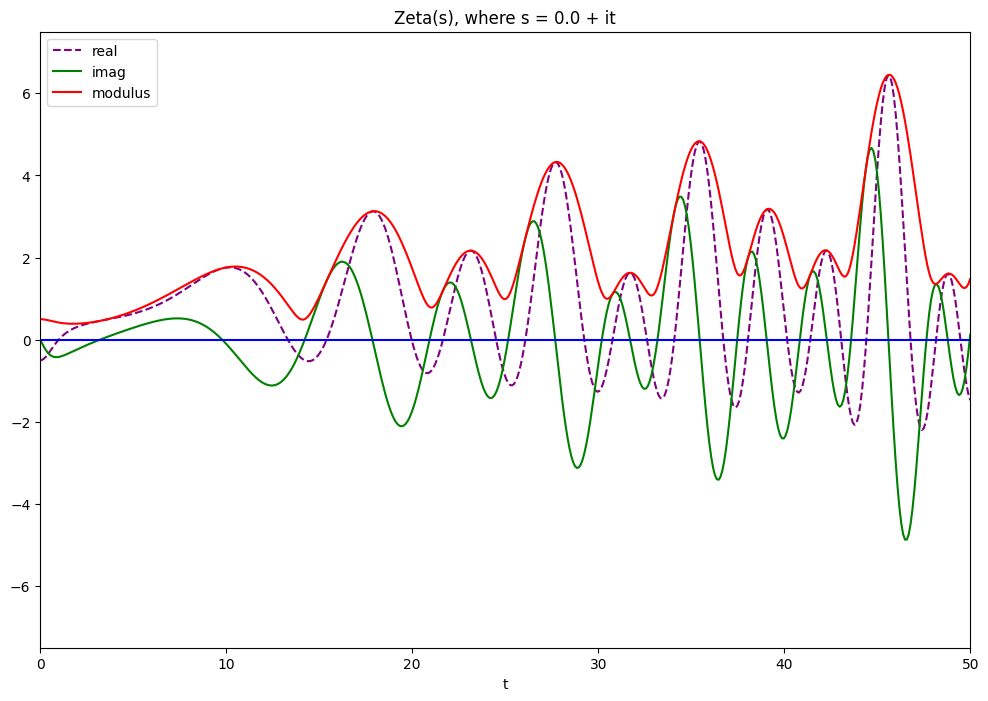

In [272]:
# Main loop

files = []

n = 0
for r_ in re:
    re_, im_, mo_ = generator(im, r_) 
    plots(re_, im_, mo_, im, r_)
    file = f'plots/plot_{n}.png'
    plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
    files.append(file)

    if (n) % 1000 == 0: plt.show()
    else: plt.close("all")

    n = n + 1

# Animated gif generation
save_gif_PIL("riemann_9.gif", files, fps=15, loop=0)